# EGRMGMT 590.10 Homework 3

*Due at 6:15pm ET on Thursday, February 21*

## Instructions

+ There are 16 exercises in total. Exercise 1 through 14 require coding. Your grades are based on the accuracy of the results, not the code execution speed.
  + Exercise 1 to 7, 10, 11, 13, 15 and 16: each is worth 0.5 points. 
  + Exercise 8, 9, 12 and 14: 1 point.
+ Exercise 8 and 9 require to create the curves **from scratch** without relying on scikit-learn, Scikit-plot, or any other modules with functions or capabilities to "plug-in and plot" those curves.
+ Exercises are dependent on prior exercises. Please work on them in the pre-determined order.
+ Submit the .ipynb file to Sakai before 6:15pm ET on Thursday, February 21.
+ Assignments handed in late will lose 1 point every 24-hour window after 6:15pm ET on Thursday, February 21.

## Dataset

**Dataset Information:**

We'll be working on a breast cancer dataset containing 569 samples of malignant and benign tumor cells. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

+ 1st column: ID number 
+ 2nd column: Diagnosis (M = malignant, B = benign) 
+ 3rd - 32th columns: 30 numerical features computed for each cell nucleus

**Dataset Source:**
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(Diagnostic)

## Exercises

**Exercise Overview**

+ We'll conduct classification analysis using the 30 numerical features to predict the likelihood that a given sample is malignant or benign. 

### Exercise 1 

+ Read the breast cancer dataset from its URL (https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)
+ Keep the 30 numerical features in a NumPy array X
+ Use sklearn to encode the diagnosis labels (i.e. 'M' and 'B') to integers (i.e. 1 and 0) and keep the results in a NumPy array y

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)
X=np.array(df[df.columns[df.dtypes=='float']])
encoder = LabelEncoder()
y=np.array(encoder.fit_transform(df.loc[:,1]))

In [2]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exercise 2

+ Use matplotlib to create a matrix of histograms for the 30 input features
+ Each subplot is for a unique feature and includes two histograms: one for the malignant tumors and the other for the benign tumors
+ Observe how the distributions vary between the malignant and benign tumors 

In [3]:
%matplotlib inline

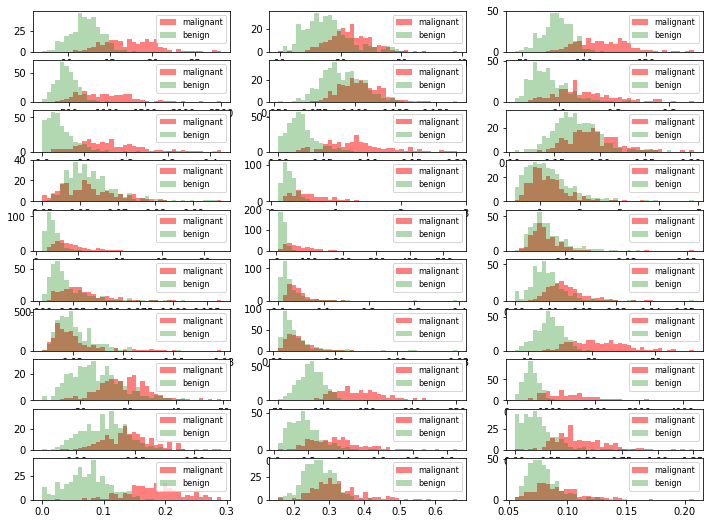

In [4]:
import matplotlib.pyplot as plt
fig,axes =plt.subplots(10,3, figsize=(12, 9))

malignant = X[y==1]
benign=X[y==0]

ax=axes.ravel()
for i in range(30):
  _,bins=np.histogram(X[:,i],bins=40)
  ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)
  ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)
  ax[i].legend(['malignant','benign'],loc='best',fontsize=8)


plt.show()


### Exercise 3

+ Use the stratified sampling approach to split the input features X and the output variable y into training and testing sets (i.e. X_train, y_train, X_test, and y_test) at a 8:2 ratio while preserving the proportions of malignant and benign tumors in each set
+ Compare the proportions of malignant and benign tumors among the overall, training, and testing sets

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index] , X[test_index]
    y_train, y_test = y[train_index] , y[test_index]
 

print("Proportion of malignant tumors in overall")
print(len(X[y==1])/len(X))
print("\n")
print("Proportion of benign tumors in overall")
print(len(X[y==0])/len(X))
print("\n")

print("Proportion of malignant tumors in training")
print(len(X_train[y_train==1])/len(X_train))
print("\n")
print("Proportion of benign tumors in training")
print(len(X_train[y_train==0])/len(X_train))
print("\n")

print("Proportion of malignant tumors in test")
print(len(X_test[y_test==1])/len(X_test))
print("\n")
print("Proportion of benign tumors in test")
print(len(X_test[y_test==0])/len(X_test))
print("\n")

Proportion of malignant tumors in overall
0.37258347978910367


Proportion of benign tumors in overall
0.6274165202108963


Proportion of malignant tumors in training
0.37362637362637363


Proportion of benign tumors in training
0.6263736263736264


Proportion of malignant tumors in test
0.3684210526315789


Proportion of benign tumors in test
0.631578947368421




### Exercise 4

+ Use sklearn to create a Pipeline to process the data and build a classifier using the training dataset
+ The Pipeline includes three sequential steps:
  * Standardizing the 30 input features 
  * Using sklearn's PCA to reduce the 30 input features into 2 components
  * Fitting a logistic regression model using the 2 components as input variables
+ Apply the Pipeline to the training dataset and calculate its prediction accuracy rate

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

estimators = [('Scaler',StandardScaler()),('reduce dim', PCA(n_components=2,random_state=42)),
              ('clf',LogisticRegression(random_state=42))]
pipe=Pipeline(estimators)

pipe.fit(X_train,y_train)
predicted = pipe.predict(X_train)
print(accuracy_score(y_train, predicted))


0.9516483516483516


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Exercise 5

+ Create a precision and recall tradeoff chart using the training dataset and its predictions based on the Pipeline created in Exercise 4
+ Print the value of the optimal probability cut point for predicting the diagnosis outcomes

[0.37362637 0.94578313 1.        ]
[1.         0.92352941 0.        ]


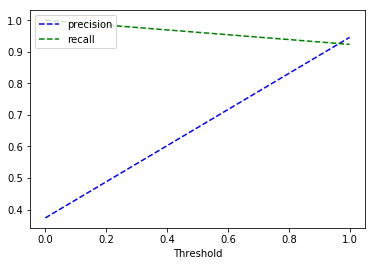

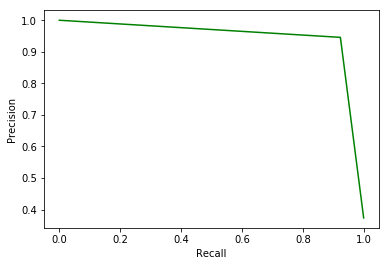

0.8919504643962849


In [8]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold =precision_recall_curve(y_train,predicted)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train,predicted)

import matplotlib.pyplot as plt
print(precision,recall, sep='\n')

plt.plot(threshold, precision[:-1], 'b--', label='precision')
plt.plot(threshold, recall[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')


plt.show()

plt.plot(recall,precision, 'g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print(max(tpr-fpr))



### Exercise 6

+ Apply the Pipeline created in Exercise 4 and make predictions for the testing dataset
+ Calculate the following model quality metrics based on the testing dataset and its predictions
  * Confusion matrix
  * Precision score
  * Recall score
  * F1 score
  * ROC AUC score

In [9]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score, f1_score,roc_auc_score, classification_report
predicted1=pipe.predict(X_test)
print(confusion_matrix(y_test,predicted1))
print(precision_score(y_test,predicted1))
print(recall_score(y_test,predicted1))
print(f1_score(y_test,predicted1))
print(roc_auc_score(y_test,predicted1))

[[71  1]
 [ 5 37]]
0.9736842105263158
0.8809523809523809
0.925
0.933531746031746


### Exercise 7

+ Use sklearn to create two ROC curves on the same chart for the Pipeline created in Exercise 4:
  * One ROC curve is based on the training dataset and its predictions
  * The other ROC curve is based on the testing dataset and its predictions
+ Assess the chances of overfitting and underfitting by comparing the two ROC curves

[0.         0.01388889 1.        ]
[0.         0.88095238 1.        ]
[0.         0.03157895 1.        ]
[0.         0.92352941 1.        ]


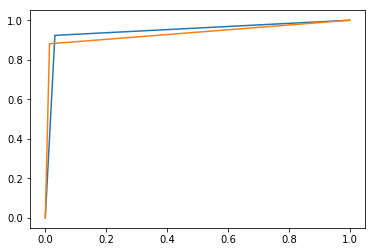

In [10]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_train,predicted)
plt.plot(fpr,tpr)
fpr1,tpr1,t=metrics.roc_curve(y_test,predicted1)
plt.plot(fpr1,tpr1)
print(fpr1)
print(tpr1)
print(fpr)
print(tpr)
plt.show()

#the chances of underfitting are relatively higher than overfitting by comparing the two ROC curves are significantly clost to each other.

### Exercise 8

+ Write a function plotROC(y, y_prob) to create a ROC curve from scratch:
    * y contains the actual outcomes
    * y_prob contains the predicted probabilities of the outcome occurring
+ Apply the plotROC function to the testing dataset and its prediction based on the Pipeline created in Exercise 4

In [10]:
def plotROC1(y, y_prob):
    tpr, fpr, thresholds = [],[],[]
    thresholds = np.concatenate(([np.max(y_prob)+1],np.unique(y_prob)[::-1]), axis=None)
    for threshold in thresholds:
        y_p = list(map(lambda x : 1 if x >= threshold else 0, y_prob)) 
        tp = fp = tn = fn = 0
        for ind in range(len(y_p)):
            if y[ind] & y_p[ind] == 1: tp += 1 
            elif y[ind] | y_p[ind] == 0: tn += 1
            elif ~y[ind] & y_p[ind] == 1: fp +=1
            else: fn += 1
        tpr.append(tp/(tp+fn))
        fpr.append(fp/(fp+tn))
    return fpr, tpr, thresholds

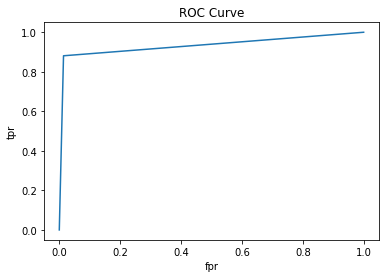

In [11]:
fpr, tpr, thresh = plotROC1(y_test, predicted1)
#print(tpr,fpr, thresh, sep='\n')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

### Exercise 9

+ Create a cumulative gains chart from scratch using the testing dataset and its predictions based on the Pipeline created in Exercise 4

In [11]:
predicted2 = pipe.predict_proba(X_test)
baseline , sample = np.linspace(0,1,11), np.linspace(0,1,11)
class_gain = []
for i in range(len(predicted2[0])):
    class_proba = predicted2[:,i]
    m = []
    m.append(class_proba)
    m.append(y_test)
    fin1 = np.array(m).T
    fin = fin1[fin1[:,0].argsort()][::-1]
    tot_res = len(fin[np.where(fin[:,1] == i)])
    cls_gain = []
    for smp in sample:
        s = fin[:int(len(fin)*smp), :]
        res = len(s[np.where(s[:,1] == i)])
        cls_gain.append(float(res/tot_res))
    class_gain.append(cls_gain)

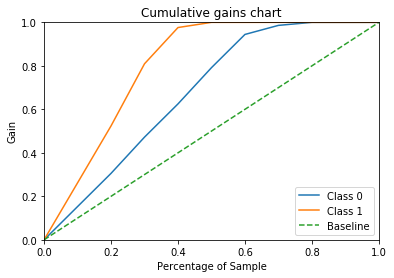

In [12]:
for i in range(len(class_gain)):
    plt.plot(sample,class_gain[i], label='Class ' + str(i))
plt.plot(sample,baseline,'--', label='Baseline')
plt.xlim(left=0, right=1.0)
plt.ylim(bottom=0,top=1.0)
plt.xlabel('Percentage of Sample')
plt.ylabel('Gain')
plt.legend(loc='lower right')
plt.title('Cumulative gains chart')
plt.show()

/home/prashant/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


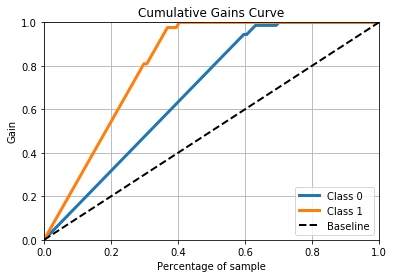

In [14]:
import scikitplot as skplt 
import matplotlib.pyplot as plt
predicted2 = pipe.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted2) 

### Exercise 10

+ Use sklearn to create a 10-fold stratified cross-validation for the training dataset while preserving the proportions of diagnosis in each fold
+ Re-fit the Pipeline specified in Exercise 4 via the 10-fold cross-validation on the training dataset, i.e. each iteration involves training the model on 9 folds and validating the model on the remaining 1 fold 
+ Print the accuracy rate of each of the validation fold

In [14]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_train, y_train)
i=0
for train_index, test_index in skf.split(X_train, y_train):
    X_train1, X_test1 = X[train_index], X[test_index]
    y_train1, y_test1 = y[train_index], y[test_index]
    pipe.fit(X_train1,y_train1)
    predicted = pipe.predict(X_test1)
    print(accuracy_score(y_test1, predicted))

0.9565217391304348
0.9347826086956522
0.8913043478260869
0.9347826086956522
1.0
0.9777777777777777
0.9555555555555556
0.9555555555555556
0.9777777777777777
0.9777777777777777


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

### Exercise 11

+ Build a KNN classifier (*hint: sklearn's KNeighborsClassifier*) using the original 30 input features and find a set of top-performing hyperparameters (i.e. weights and number of neighbors) using a **grid search** with a 10-fold cross-validation on the training dataset
+ Identify the best combination of hyperparameters based on the F1 scores
+ Apply the best KNN classifier you identified to the testing dataset and calculate its F1 score based on its predictions

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score

In [17]:
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1,20)),
          'weights': ['uniform', 'distance']}
grid_search1 = GridSearchCV(estimator=knn,
                           param_grid=params,
                           n_jobs=-1,
                           cv=KFold(n_splits=10,random_state=42))
grid_search1.fit(X_train,y_train)
print('Best performing params:', grid_search1.best_params_)

Best performing params: {'n_neighbors': 11, 'weights': 'distance'}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
best_combi = (1,'uniform')
f1_max = 0.0
for weights in ['uniform', 'distance']:
    for neighbors in range(1,20):
        knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weights, n_jobs=-1)
        knn.fit(X_train,y_train)
        f1 = f1_score(y_test, knn.predict(X_test))
        if f1 > f1_max:
            f1_max = f1
            best_combi = (neighbors,weights)
            if neighbors==11 and weights == 'distance':
                print(f1)
print('Best performing params: ', {'neighbors': best_combi[0],
                                        'weights'  : best_combi[1]})

Best performing params:  {'neighbors': 11, 'weights': 'uniform'}


In [39]:
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform', n_jobs=-1)
knn.fit(X_train,y_train)
f1 = f1_score(y_test, knn.predict(X_test))
print('f1 score : ', f1)

f1 score :  0.923076923076923


### Exercise 12

+ Create a chart to visualize the grid search results of Exercise 11
+ Visualize how the average model quality metric of the validation folds varies across different combinations of hyperparameters 
+ Demonstrate the best hyperparameter combination identified in Exercise 11 indeed resulted in the highest model quality metric

In [20]:
import pandas as pd

In [42]:
scores_df = pd.DataFrame(grid_search1.cv_results_)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [43]:
pd.set_option('display.max_columns', None)

In [44]:
X_axis = scores_df.apply(lambda x : str(x['param_n_neighbors'])+'-'+str(x['param_weights']), axis = 1)

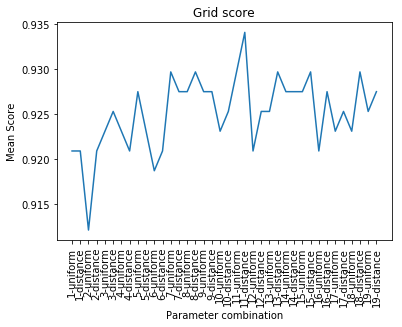

In [45]:
plt.plot(X_axis,scores_df['mean_test_score'])
plt.xticks(rotation=90)
plt.xlabel('Parameter combination')
plt.ylabel('Mean Score')
plt.title('Grid score')
plt.show()

#You can see from below that 11, Uniform gives the best parameter score.

### Exercise 13

+ Build a KNN classifier (*hint: sklearn's KNeighborsClassifier*) using the original 30 input features and find a set of top-performing hyperparameters (i.e. weights and number of neighbors) using a **random search** with a 10-fold cross-validation on the training dataset
+ Identify the best combination of hyperparameters based on the F1 scores
+ Apply the best KNN classifier you identified to the testing dataset and calculate the F1 score based on its predictions

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1,20)),
          'weights': ['uniform', 'distance']}
rand_search = RandomizedSearchCV(estimator=knn,
                           param_distributions=params,
                           n_jobs=-1,
                           cv=KFold(n_splits=10,random_state=42),
                           random_state=42)
rand_search.fit(X_train,y_train)
print('Best performing params:', rand_search.best_params_)

Best performing params: {'weights': 'distance', 'n_neighbors': 8}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
best_combi = (1,'uniform')
f1_max = 0.0
for weights in ['uniform', 'distance']:
    for neighbors in range(1,20):
        knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weights, n_jobs=-1)
        knn.fit(X_train,y_train)
        f1 = f1_score(y_test, knn.predict(X_test))
        if f1 > f1_max:
            f1_max = f1
            best_combi = (neighbors,weights)
print('Best performing params: ', {'neighbors': best_combi[0],
                                        'weights'  : best_combi[1]})

Best performing params:  {'neighbors': 11, 'weights': 'uniform'}


In [28]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', n_jobs=-1)
knn.fit(X_train,y_train)
f1 = f1_score(y_test, knn.predict(X_test))
print('f1 score : ', f1)

f1 score :  0.8684210526315789


11 neigbors gives a better f1 score

### Exercise 14

+ Build a KNN classifier via a 10-fold cross-validation on the training dataset using the 30 original input features and the best hyperparameters identified in Exercise 13
+ Build a Random Forest classifier via a 10-fold cross validation on the training dataset using the 30 original input features and setting 50 as the number of trees in the forest
+ Create a pair of box plots to compare a model quality metric across the validation folds used to validate the KNN and Random Forest models

In [29]:
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform', n_jobs=-1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
           weights='uniform')

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rn = RandomForestClassifier(n_estimators=50, random_state=42)
params = {'max_depth': list(range(2,10)),
          'criterion': ['gini', 'entropy'],
          'max_features': [0.05,0.1,0.15,0.2]}
grid_search = GridSearchCV(estimator=rn,
                           param_grid=params,
                           n_jobs=-1,
                           cv=KFold(n_splits=10,random_state=42))
grid_search.fit(X_train,y_train)
print('Best performing params:', grid_search.best_params_)

Best performing params: {'criterion': 'gini', 'max_depth': 9, 'max_features': 0.05}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
import seaborn as sns

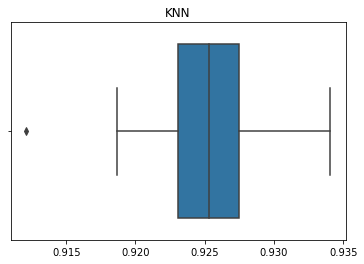

In [36]:
sns.boxplot(grid_search1.cv_results_['mean_test_score'])
plt.title("KNN")
plt.show()

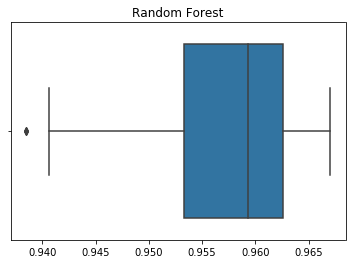

In [35]:
sns.boxplot(grid_search.cv_results_['mean_test_score'])
plt.title("Random Forest")
plt.show()

### Exercise 15

+ Explain how the bias and variance would change when using a large vs. small k for the k-fold cross-validation

In [ ]:
# lower K = less variance and more bias while higher K =  more variance and lower bias

### Exercise 16

+ Explain the difference between probability, odds, and odds ratio

In [ ]:
"""The probability that an event will occur is the fraction of times you expect to see that 
event in many trials. Probabilities always range between 0 and 1. The odds are defined as 
the probability that the event will occur divided by the probability that the event will not occur. 
odds ratios are frequently used to express the relative chance of an event happening under two different conditions"""

#Example

"""Suppose that the probability of a bad outcome is 0.2 if a patient takes the existing treatment, 
but that this is reduced to 0.1 if they take the new treatment. The odds of a bad outcome with the existing 
treatment is 0.2/0.8=0.25, while the odds on the new treatment are 0.1/0.9=0.111 (recurring). The odds ratio 
comparing the new treatment to the old treatment is then simply the 
correspond ratio of odds: (0.1/0.9) / (0.2/0.8) = 0.111 / 0.25 = 0.444 (recurring). This means that the 
odds of a bad outcome if a patient takes the new treatment are 0.444 that of the odds of a bad outcome 
if they take the existing treatment. The odds (and hence probability) of a bad outcome are reduced by 
taking the new treatment. We could also express the reduction by saying that the odds are reduced by 
approximately 56%, since the odds are reduced by a factor of 0.444"""